# Stunting Toddler Detection 
- Umur (Bulan): Mengindikasikan usia balita dalam bulan. Rentang usia ini penting untuk menentukan fase pertumbuhan anak dan membandingkannya dengan standar pertumbuhan yang sehat.
- Jenis Kelamin: Terdapat dua kategori dalam kolom ini, 'laki-laki' dan 'perempuan'. Jenis kelamin merupakan faktor penting dalam analisis pola pertumbuhan dan risiko stunting.
- Tinggi Badan: Dicatat dalam centimeter, tinggi badan adalah indikator utama untuk menilai pertumbuhan fisik balita. Data ini memungkinkan peneliti untuk menentukan apakah pertumbuhan anak sesuai dengan standar usianya.
- Status Gizi: Kolom ini dikategorikan menjadi 4 status - 'severely stunting', 'stunting', 'normal', dan 'tinggi'. 'Severely stunting' menunjukkan kondisi sangat serius, 'stunting' menunjukkan kondisi stunting, 'normal' mengindikasikan status gizi yang sehat, dan 'tinggi' menunjukkan pertumbuhan di atas rata-rata. Kategori ini membantu dalam identifikasi cepat dan intervensi bagi anak-anak yang berisiko atau mengalami masalah pertumbuhan.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("data_balita.csv")
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [3]:
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(81574)

In [5]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39425 entries, 0 to 120993
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       39425 non-null  int64  
 1   Jenis Kelamin      39425 non-null  object 
 2   Tinggi Badan (cm)  39425 non-null  float64
 3   Status Gizi        39425 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [7]:
df.columns=df.columns.str.lower().str.replace(" ","_").str.replace("(","").str.replace(")","")
df.head()

,umur_bulan,jenis_kelamin,tinggi_badan_cm,status_gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


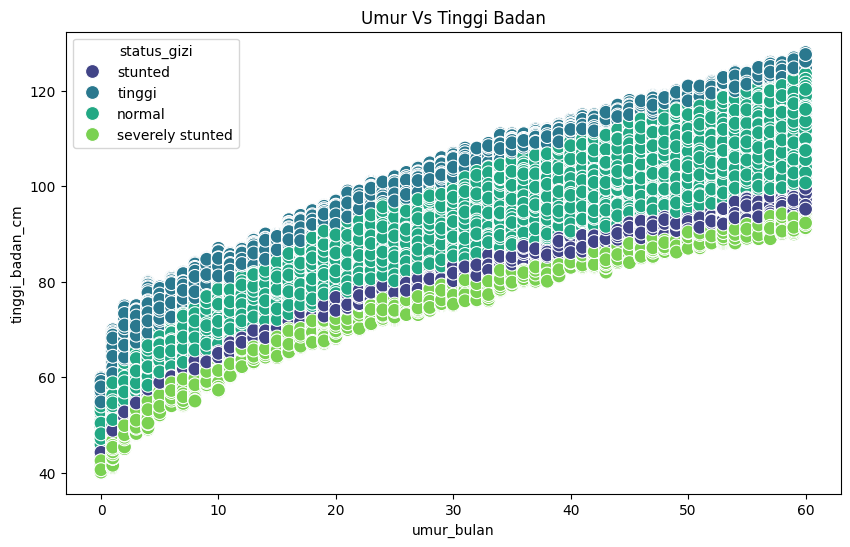

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='umur_bulan',y='tinggi_badan_cm',hue='status_gizi',palette='viridis',s=100)
plt.title("Umur Vs Tinggi Badan")
plt.show()

C:\Users\HAMM\AppData\Local\Temp\ipykernel_34616\4198000531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='jenis_kelamin', palette='Set2')


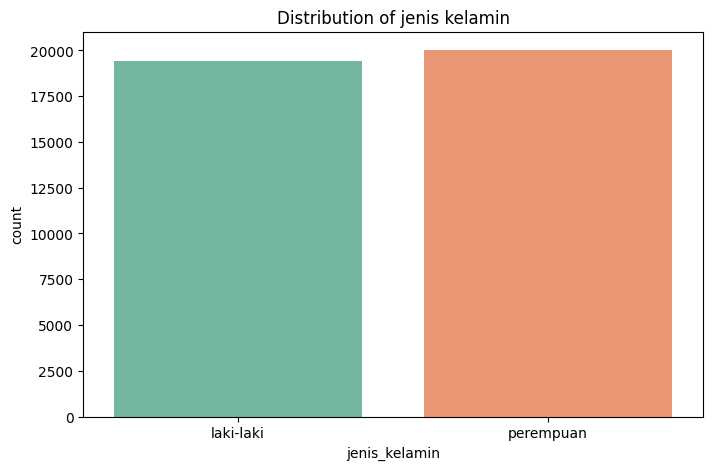

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='jenis_kelamin', palette='Set2')
plt.title('Distribution of jenis kelamin')
plt.show()

C:\Users\HAMM\AppData\Local\Temp\ipykernel_34616\4150728834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='status_gizi', palette='coolwarm')


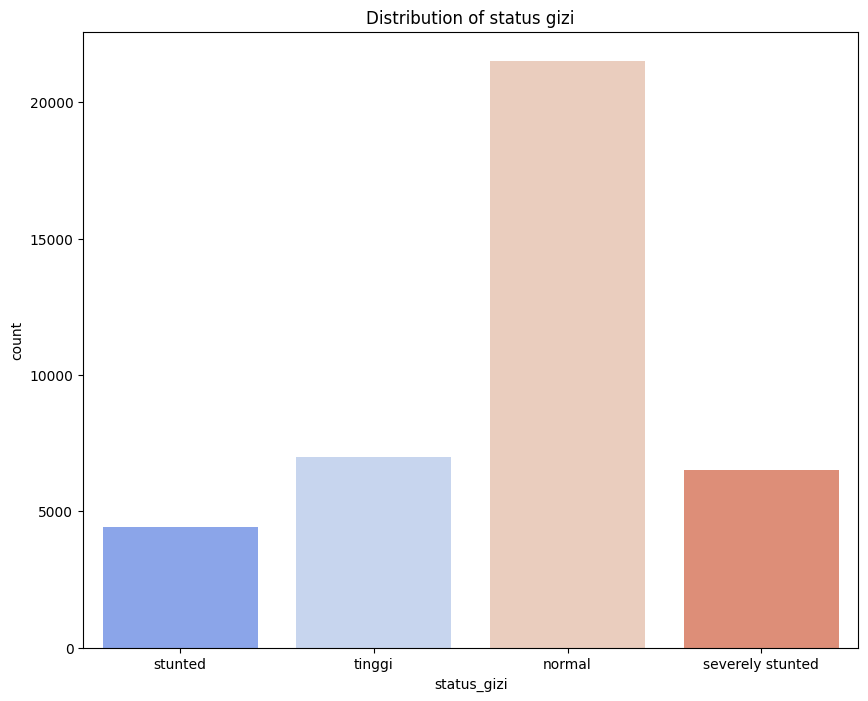

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='status_gizi', palette='coolwarm')
plt.title("Distribution of status gizi")
plt.show()

In [11]:
df.describe()

,umur_bulan,tinggi_badan_cm
count,39425.000000,39425.000000
mean,28.301332,86.040251
std,19.260394,19.766565
min,0.000000,40.010437
25%,10.000000,72.100000
50%,29.000000,88.400000
75%,45.000000,100.800000
max,60.000000,128.000000


C:\Users\HAMM\AppData\Local\Temp\ipykernel_34616\8591771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='status_gizi',y='tinggi_badan_cm',palette='Set2')


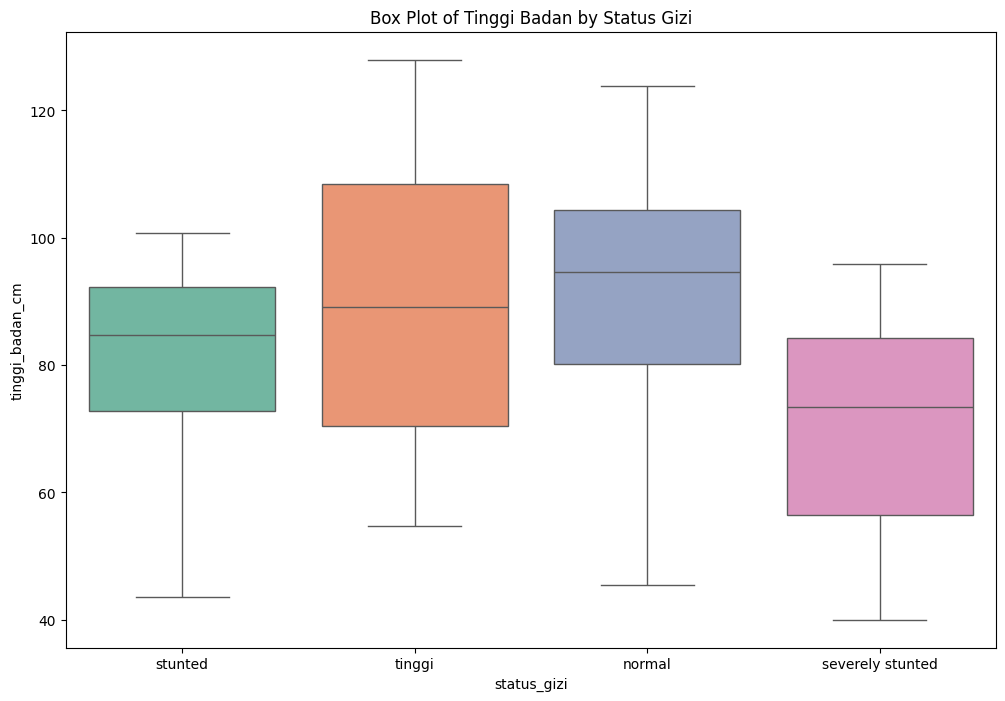

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='status_gizi',y='tinggi_badan_cm',palette='Set2')
plt.title('Box Plot of Tinggi Badan by Status Gizi')
plt.show()

In [14]:
le=LabelEncoder()
df['jenis_kelamin']=le.fit_transform(df['jenis_kelamin'])
df['status_gizi']=le.fit_transform(df['status_gizi'])

X=df.drop('status_gizi',axis=1)
y=df['status_gizi']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

model=KNeighborsClassifier(algorithm='kd_tree',n_neighbors=1)
model.fit(X_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
df.head()

,umur_bulan,jenis_kelamin,tinggi_badan_cm,status_gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1


In [15]:
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy model knn: {acc}")

Accuracy model knn: 0.9913760304375396


Clasification report model knn:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4339
           1       0.99      0.99      0.99      1330
           2       0.98      0.97      0.98       838
           3       0.99      0.99      0.99      1378

    accuracy                           0.99      7885
   macro avg       0.99      0.99      0.99      7885
weighted avg       0.99      0.99      0.99      7885



<Axes: >

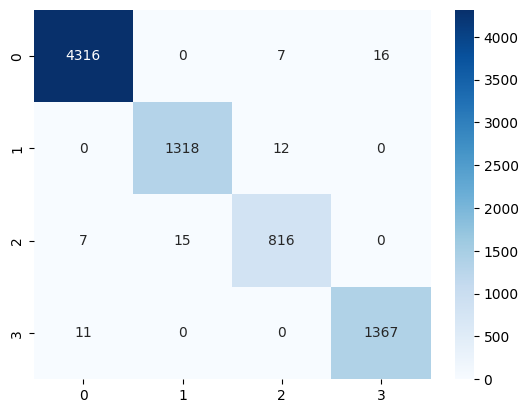

In [21]:
print("Clasification report model knn:\n",classification_report(y_test.values.reshape(-1,1),y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')

In [23]:
import joblib

joblib.dump(model,'stunting_model.pkl')

['stunting_model.pkl']